In [ ]:
# Emotion Detection from Text 📊🙂😢

#This notebook helps you build a basic machine learning model to detect emotions from text using Python and Scikit-learn.


## 🔹 Step 1: Install Required Libraries

!pip install neattext pandas scikit-learn seaborn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Sample dataset
data = {
    'text': [
        "I am so happy today!",
        "This is frustrating.",
        "I'm feeling really sad.",
        "Wow! What a great surprise!",
        "I am very angry about this.",
        "Feeling loved and appreciated.",
        "I hate this so much.",
        "I'm excited for the trip."
    ],
    'emotion': [
        "happy", "angry", "sad", "happy", "angry", "happy", "angry", "happy"
    ]
}
df = pd.DataFrame(data)
df.head()


,text,emotion
0,I am so happy today!,happy
1,This is frustrating.,angry
2,I'm feeling really sad.,sad
3,Wow! What a great surprise!,happy
4,I am very angry about this.,angry


In [ ]:
df['clean_text'] = df['text'].apply(nfx.remove_stopwords)
df['clean_text'] = df['clean_text'].apply(nfx.remove_special_characters)


In [ ]:
X = df['clean_text']
y = df['emotion']

tfidf = TfidfVectorizer()
X_vec = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
       happy       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


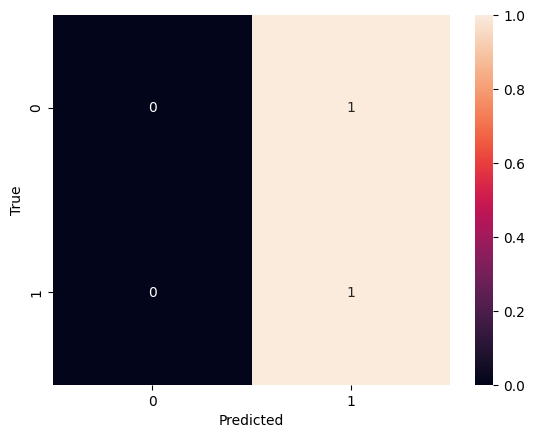

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
def predict_emotion(text):
    clean = nfx.remove_special_characters(nfx.remove_stopwords(text))
    vec = tfidf.transform([clean])
    return model.predict(vec)[0]

predict_emotion("I'm feeling awesome today!")


'happy'

In [ ]:
import joblib

joblib.dump(model, "emotion_model.pkl")
joblib.dump(tfidf, "vectorizer.pkl")


['vectorizer.pkl']

In [ ]:
!cp emotion_model.pkl /content/drive/MyDrive/
!cp vectorizer.pkl /content/drive/MyDrive/
